In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_parquet('data/02_Encuesta.parquet')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   response_id                            110 non-null    object        
 1   start_response                         110 non-null    datetime64[ns]
 2   complete_response                      110 non-null    datetime64[ns]
 3   age                                    110 non-null    category      
 4   sex                                    110 non-null    category      
 5   years_studying                         110 non-null    int64         
 6   degree                                 110 non-null    category      
 7   infrastructure_score                   110 non-null    category      
 8   notice_infrastructure_improvement      110 non-null    category      
 9   frecuency_digital_systems              110 non-null    category  

In [3]:
unique_values_dict = {}

for col in data.select_dtypes(include=['category']).columns:
    unique_values_dict[col] = data[col].unique()

for col in data.select_dtypes(include=['object']).columns:
    unique_values_dict[col] = data[col].explode().unique()

unique_values_dict

{'age': ['Menos de 17 años', '17-19 años', '23-25 años', '26 años o más']
 Categories (4, object): ['Menos de 17 años' < '17-19 años' < '23-25 años' < '26 años o más'],
 'sex': ['Femenino', 'Masculino', 'Prefiero no responder']
 Categories (3, object): ['Femenino', 'Masculino', 'Prefiero no responder'],
 'degree': ['Licenciatura en Enfermería', 'Licenciatura en Bioanálisis Clínico', 'Medicina y Cirugía', 'Licenciatura en Nutrición', 'Licenciatura en Anestesia y Reanimación', 'Odontología', 'Licenciatura en Fisioterapia', 'Licenciatura en Microbiología', 'Técnico Superior en Citología Cervical', 'Licenciatura en Optometría Médica']
 Categories (10, object): ['Licenciatura en Anestesia y Reanimación', 'Licenciatura en Bioanálisis Clínico', 'Licenciatura en Enfermería', 'Licenciatura en Fisioterapia', ..., 'Licenciatura en Optometría Médica', 'Medicina y Cirugía', 'Odontología', 'Técnico Superior en Citología Cervical'],
 'infrastructure_score': ['Regular', 'Buena', 'Muy buena', 'Deficien

# Graficos

In [4]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("viridis")
plt.style.use("ggplot")

In [5]:
def add_percentage(ax, total):
    for c in ax.containers:
        ax.bar_label(
            c,
            fmt=lambda x: f'{(x/total)*100:.1f}%',
            label_type='edge'
        )


def get_tagged_percentages(counts):
    return [f"{x} {round(counts[x] / counts.sum() * 100, 1)}%" for x in counts.index]

## Perfil Demográfico de la Muestra

Text(0, 0.5, 'conteo')

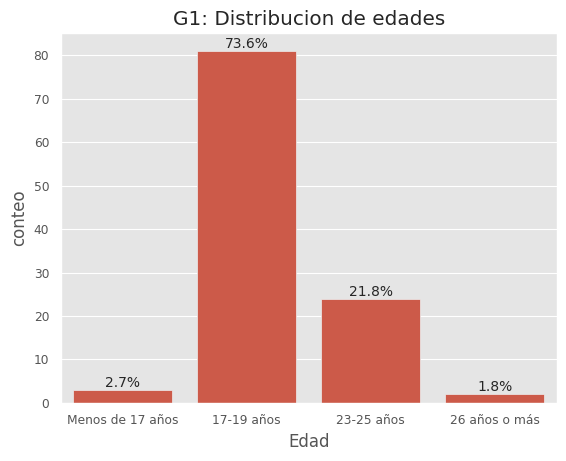

In [6]:
# Grafico 1
ax = sns.countplot(data=data, x='age')
add_percentage(ax, len(data))
plt.title("G1: Distribucion de edades")
plt.xlabel("Edad")
plt.ylabel("conteo")

El Gráfico 1 ilustra la distribución de edades de los participantes. Se observa una concentración abrumadora en el grupo de '17-19 años', que representa el 73.6% de la muestra total. El segundo grupo más significativo es el de '23-25 años' con un 21.8%. Los dos extremos, 'Menos de 17 años' (2.7%) y '26 años o más' (1.8%), constituyen una porción minoritaria.
Este hallazgo indica que la muestra es demográficamente muy homogénea. Las percepciones y valoraciones recopiladas en este estudio provienen predominantemente de estudiantes jóvenes, en las primeras etapas de su formación universitaria.


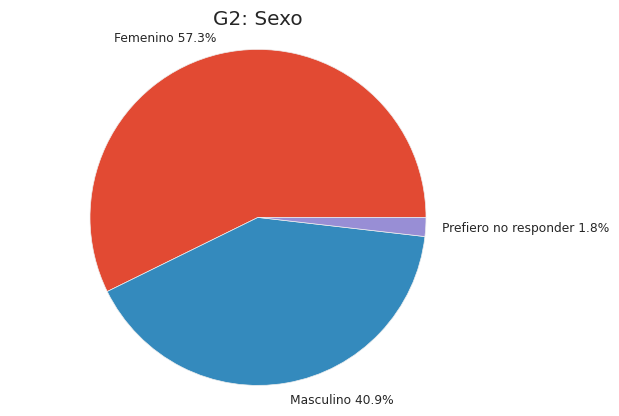

In [7]:
# Grafico 2
sex_counts = data['sex'].value_counts()

plt.pie(sex_counts, labels=get_tagged_percentages(sex_counts))
plt.title('G2: Sexo')
plt.axis('equal')

plt.show()

El Gráfico 2 detalla la composición por sexo de los 110 participantes. Se observa una clara mayoría de participantes que se identificaron como 'Femenino' (57.3%). El grupo 'Masculino' representó el 40.9% de la muestra, mientras que una minoría (1.8%) seleccionó 'Prefiero no responder'.
El hallazgo principal es que la muestra no está uniformemente distribuida por sexo; presenta un sesgo significativo hacia las participantes femeninas. Por lo tanto, las percepciones y valoraciones generales recopiladas en este estudio reflejarán predominantemente la perspectiva de este grupo demográfico.

Text(0, 0.5, 'conteo')

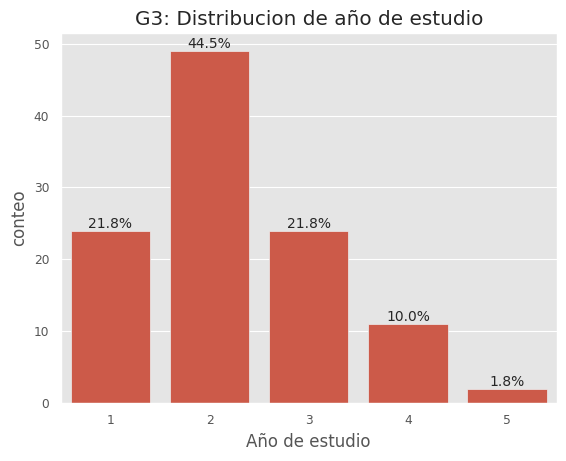

In [8]:
# Grafico 3
ax = sns.countplot(data=data, x='years_studying')
add_percentage(ax, len(data))
plt.title("G3: Distribucion de año de estudio")
plt.xlabel("Año de estudio")
plt.ylabel("conteo")

El Gráfico 3 muestra la distribución de los 110 participantes según su año de estudio. El grupo más grande de manera destacada es el de segundo año, que constituye el 44.5% de la muestra total. Los estudiantes de primer y tercer año presentan una proporción idéntica, representando cada uno el 21.8%. Los años superiores, cuarto (10.0%) y quinto (1.8%), tienen una representación considerablemente menor. 
Esto indica que la muestra está fuertemente sesgada hacia los estudiantes en la primera mitad de su formación. Más del 88% de los participantes (sumando 1ro, 2do y 3er año) están en etapas tempranas o intermedias. En contraste, los estudiantes de 4to y 5to año, quienes a menudo tienen una exposición clínica más intensiva (como el internado rotatorio), están significativamente subrepresentados en el estudio. 

Text(0.5, 0, 'Conteo')

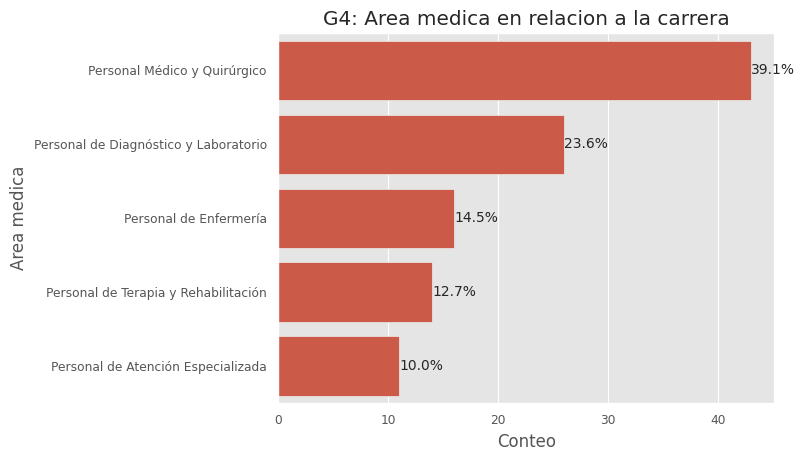

In [9]:
# Grafico 4
ax = sns.countplot(
    data=data,
    y='degree_category',
    order=data['degree_category'].value_counts().index
)
add_percentage(ax, len(data))
plt.title("G4: Area medica en relacion a la carrera")
plt.ylabel("Area medica")
plt.xlabel("Conteo")

El Gráfico 4 finaliza el perfil demográfico, mostrando la distribución de la muestra agrupada por área médica. El "Personal Médico y Quirúrgico" (ej. Medicina y Cirugía) constituye el grupo más grande, con un 39.1% del total. El "Personal de Diagnóstico y Laboratorio" (ej. Bioanálisis, Microbiología) es el segundo grupo más representativo con un 23.6%. Los tres grupos restantes, "Personal de Enfermería" (14.5%), "Personal de Terapia y Rehabilitación" (12.7%) y "Personal de Atención Especializada" (10.0%), completan la muestra. 
Esto indica que la muestra, aunque tiene una pluralidad de estudiantes de medicina, es notablemente diversa y representa un amplio espectro de roles clínicos. Las percepciones recopiladas no provienen de un único punto de vista. Los hallazgos estarán fuertemente influenciados por las perspectivas combinadas del personal médico y el de diagnóstico, que juntos superan el 62% de los participantes. 

## Observación de Avances

Text(0, 0.5, 'conteo')

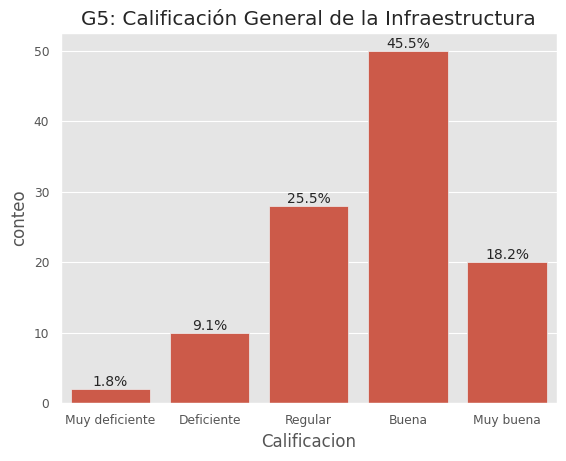

In [10]:
ax = sns.countplot(data=data, x='infrastructure_score')
add_percentage(ax, len(data))
plt.title("G5: Calificación General de la Infraestructura")
plt.xlabel("Calificacion")
plt.ylabel("conteo")

Los resultados muestran una clara tendencia positiva. La categoría más frecuente es "Buena", seleccionada por el 45.5% de los participantes. Le sigue "Regular" con un 25.5% y "Muy buena" con un 18.2%. Las calificaciones negativas son una minoría, compuestas por "Deficiente" (9.1%) y "Muy deficiente" (1.8%). 
De estos datos se infiere un consenso positivo-moderado. Si se agrupan las valoraciones, un 63.7% de los estudiantes (la suma de "Buena" y "Muy buena") tiene una percepción favorable de la infraestructura. Esto indica que la mayoría de los becados ha experimentado condiciones adecuadas y funcionales durante sus rotaciones. 
Sin embargo, el 25.5% que responde "Regular" es un grupo significativo. Esta percepción intermedia sugiere que, para un cuarto de la muestra, la infraestructura se percibe como meramente funcional, sin destacar por su modernidad. Esto puede reflejar una experiencia heterogénea: la posible coexistencia de áreas completamente modernizadas junto a pabellones más antiguos o la experiencia de estudiantes que rotaron por centros de menor complejidad. La baja proporción de respuestas negativas (10.9% en total) sugiere que las fallas críticas o el deterioro generalizado no son la norma percibida. 

Text(0.5, 22.71666666666666, 'Calificacion')

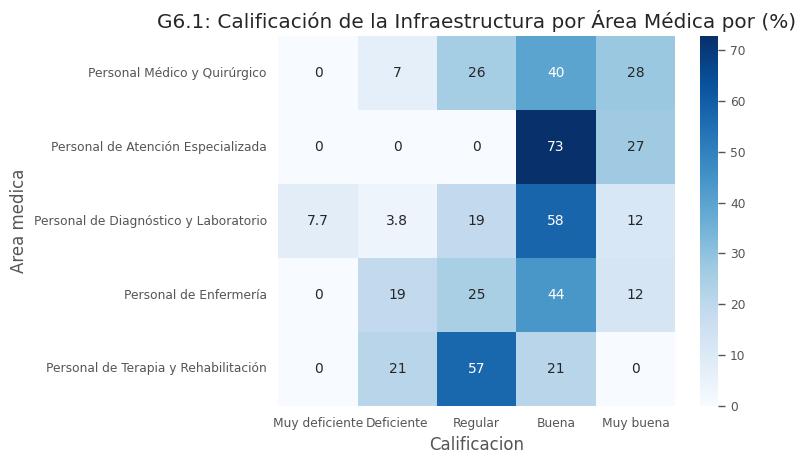

In [11]:

data_subset = pd.crosstab(
    data['degree_category'],
    data["infrastructure_score"],
    normalize="index"
) * 100
sns.heatmap(
    data_subset,
    annot=True,
    cmap='Blues'
)
plt.title('G6.1: Calificación de la Infraestructura por Área Médica por (%)')
plt.ylabel("Area medica")
plt.xlabel("Calificacion")


El Gráfico 6 (mapa de calor) muestra la calificación de la infraestructura, desglosada y normalizada por el área médica del becado. Se observa la percepción: 
    El 'Personal de Atención Especializada' reporta la visión más positiva, con un 100% de calificaciones combinadas entre 'Buena' (73%) y 'Muy buena' (27%). 
    El 'Personal de Diagnóstico y Laboratorio' también es mayoritariamente positivo, con un 70% de respuestas 'Buena' (58%) o 'Muy buena' (12%). 
    En el extremo opuesto, el 'Personal de Terapia y Rehabilitación' presenta la visión más crítica. Ningún participante (0%) la calificó como 'Muy buena', y la mayoría se concentró en 'Regular' (57%) y 'Deficiente' (21%). 
    El 'Personal de Enfermería' muestra la segunda proporción más alta de respuestas 'Deficiente' (19%), aunque su categoría más común fue 'Buena' (44%). 
La experiencia diaria y el rol clínico del becado definen su opinión. Los grupos que interactúan con áreas de nueva inversión (Atención Especializada, Diagnóstico) tienen una visión drásticamente más favorable que aquellos en áreas que, desde su perspectiva, no han sido priorizadas (Terapia). La modernización no se está experimentando de manera uniforme en todos los departamentos. 

Text(0.5, 22.71666666666666, 'Calificacion')

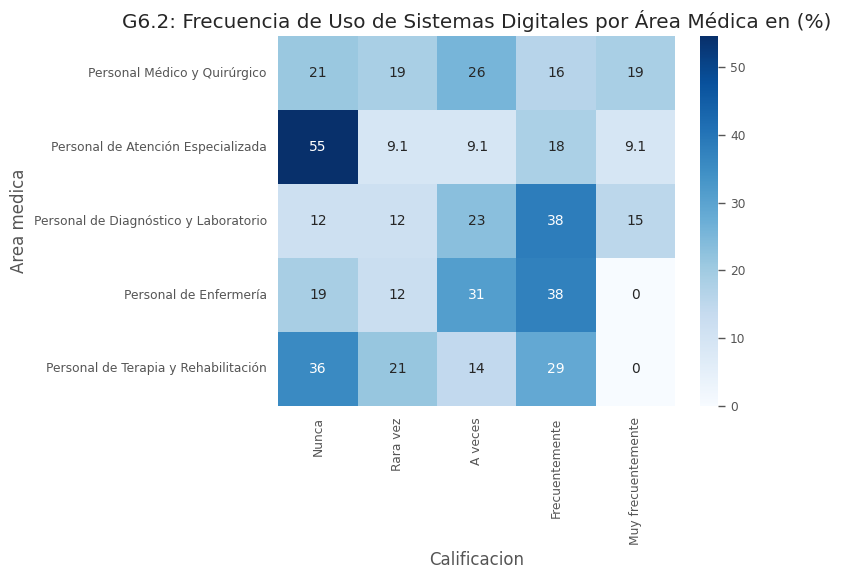

In [12]:

data_subset = pd.crosstab(
    data['degree_category'],
    data["frecuency_digital_systems"],
    normalize="index"
) * 100

sns.heatmap(
    data_subset,
    annot=True,
    cmap='Blues'
)
plt.title('G6.2: Frecuencia de Uso de Sistemas Digitales por Área Médica en (%)')
plt.ylabel("Area medica")
plt.xlabel("Calificacion")


El Gráfico 6 es un mapa de calor que da respuesta al primer objetivo, centrándose en la observación de la tecnología. Visualiza la variable frecuency_digital_systems , que se deriva de la pregunta 8 del cuestionario: "¿Con qué frecuencia ha observado el uso de sistemas digitales (expedientes electrónicos, telemedicina, imágenes digitales) durante sus prácticas o rotaciones?". 

El gráfico desglosa las respuestas según el área médica del becado (degree_category). Cada fila horizontal representa el 100% de las respuestas para ese grupo específico, mostrando cómo se distribuye la percepción de frecuencia. Los colores más oscuros indican una mayor concentración de respuestas. A simple vista, se observa una adopción de tecnología muy desigual: los grupos de "Diagnóstico" y "Enfermería" muestran un uso frecuente, mientras que "Atención Especializada" y "Terapia" reportan una falta de uso significativa. 

El análisis de los datos de alta precisión revela una clara polarización en la adopción de la tecnología digital en la red hospitalaria: 

    Usuarios Frecuentes: El "Personal de Diagnóstico y Laboratorio" es el adoptante más claro y consistente. Más de la mitad de este grupo (53.84%) reporta usar sistemas digitales "Frecuentemente" (38.46%) o "Muy frecuentemente" (15.38%). Esto es coherente con sus roles (bioanálisis, microbiología, imagenología), que dependen inherentemente de equipos digitales para el procesamiento de imágenes y resultados. 

    Usuarios Regulares: El "Personal de Enfermería" también muestra una alta tasa de uso, pero con un matiz importante. Su uso se concentra en "Frecuentemente" (37.5%) y "A veces" (31.25%). Sin embargo, un 0.0% de este grupo reporta un uso "Muy frecuente", sugiriendo que su interacción con los sistemas es regular y funcional, pero quizás limitada a tareas específicas (como la consulta de expedientes) en lugar de una inmersión digital completa. 

    No Usuarios / Usuarios Ocasionales: En el extremo opuesto, el "Personal de Atención Especializada" reporta la menor adopción, con una mayoría absoluta (54.55%) afirmando que "Nunca" ha observado estos sistemas. Le sigue el "Personal de Terapia y Rehabilitación", donde un 35.71% también selecciona "Nunca". 

    Experiencia Mixta: El "Personal Médico y Quirúrgico", que es el grupo más grande de la muestra, no presenta un patrón claro. Sus respuestas están notablemente distribuidas en todas las categorías: 20.93% "Nunca", 18.60% "Rara vez", 25.58% "A veces", 16.28% "Frecuentemente" y 18.60% "Muy frecuentemente". Esto sugiere que la digitalización no es un estándar en la práctica médica; su uso parece depender del hospital, del servicio específico o de la especialidad del médico. 

## Nivel de Conocimiento

Text(0, 0.5, 'Tecnologias')

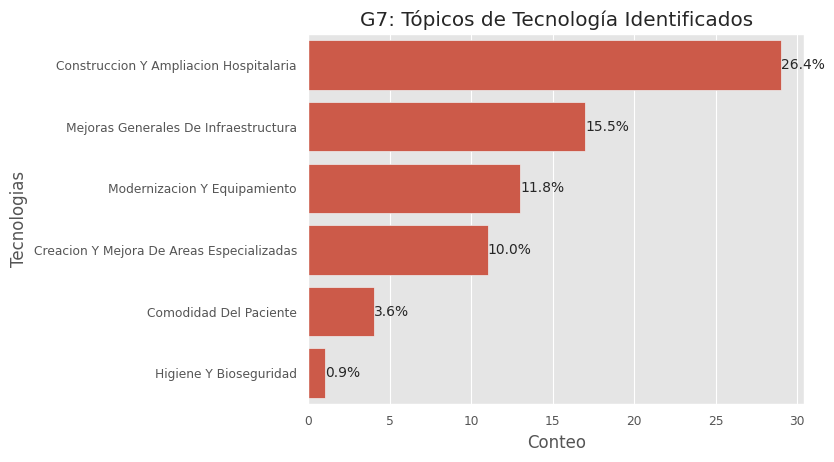

In [13]:
data_subset = data["infrastructure_changes_topic"].str.split(
    '_').str.join(' ').str.title()
ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("G7: Tópicos de Tecnología Identificados")
plt.xlabel("Conteo")
plt.ylabel("Tecnologias")

El tópico más relevante para los estudiantes es, por un amplio margen, la "Gestión de Información Médica Digital" (27.3%). En segundo lugar se encuentra la "Imagenología y Diagnóstico por Imagen" (18.2%). Un tercer grupo de tecnologías incluye "Equipos Quirúrgicos y Anestesia" (10.0%) y "Equipos de Diagnóstico y Laboratorio" (7.3%).

El hallazgo principal es que el conocimiento de los estudiantes sobre "tecnología" está fuertemente enfocado en el software y los datos. El tópico principal (27.3%) se refiere a los sistemas de gestión como el Expediente Clínico Electrónico (ECE). Si se suma el "Sistemas de Gestión Hospitalaria" (6.4%) y la "Telemedicina" (5.5%), se observa que casi el 40% de la percepción de modernización tecnológica está ligada al software y la gestión de la información, más que al hardware.
El segundo pilar del conocimiento es el hardware de diagnóstico. "Imagenología" (18.2%) y "Equipos de Diagnóstico" (7.3%) juntos representan más de una cuarta parte de las respuestas, lo que es coherente con la experiencia de rotación en áreas que dependen de Rayos X, TAC o equipos de laboratorio.

Text(0, 0.5, 'Cambios en la infrastructura')

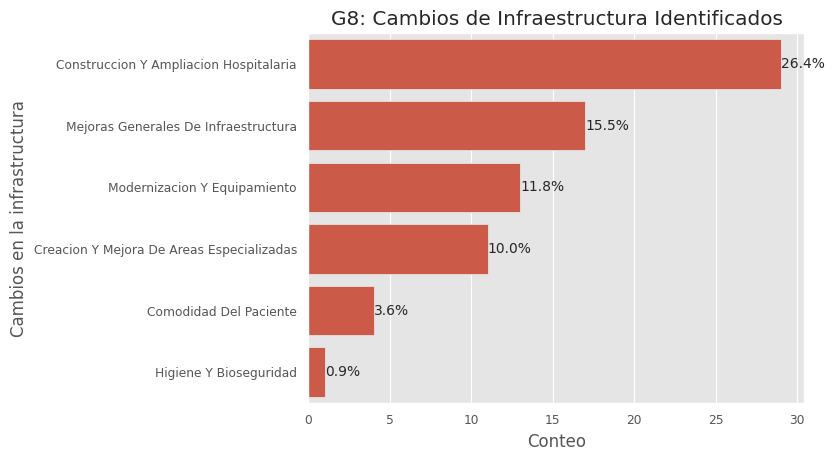

In [14]:
data_subset = data["infrastructure_changes_topic"].str.split(
    '_').str.join(' ').str.title()
ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("G8: Cambios de Infraestructura Identificados")
plt.xlabel("Conteo")
plt.ylabel("Cambios en la infrastructura")


El tópico más relevante para los estudiantes es, por un amplio margen, la "Gestión de Información Médica Digital" (27.3%). En segundo lugar, se encuentra la "Imagenología y Diagnóstico por Imagen" (18.2%). Un tercer grupo de tecnologías incluye "Equipos Quirúrgicos y Anestesia" (10.0%) y "Equipos de Diagnóstico y Laboratorio" (7.3%). 

El hallazgo principal es que el conocimiento de los estudiantes sobre "tecnología" está fuertemente enfocado en el software y los datos. El tópico principal (27.3%) se refiere a los sistemas de gestión como el Expediente Clínico Electrónico (ECE). Si se suma el "Sistemas de Gestión Hospitalaria" (6.4%) y la "Telemedicina" (5.5%), se observa que casi el 40% de la percepción de modernización tecnológica está ligada al software y la gestión de la información, más que al hardware. 

El segundo pilar del conocimiento es el hardware de diagnóstico. "Imagenología" (18.2%) y "Equipos de Diagnóstico" (7.3%) juntos representan más de una cuarta parte de las respuestas, lo que es coherente con la experiencia de rotación en áreas que dependen de Rayos X, TAC o equipos de laboratorio. 

## Opinión y Valoración

Text(0.5, 0, 'Calificacion')

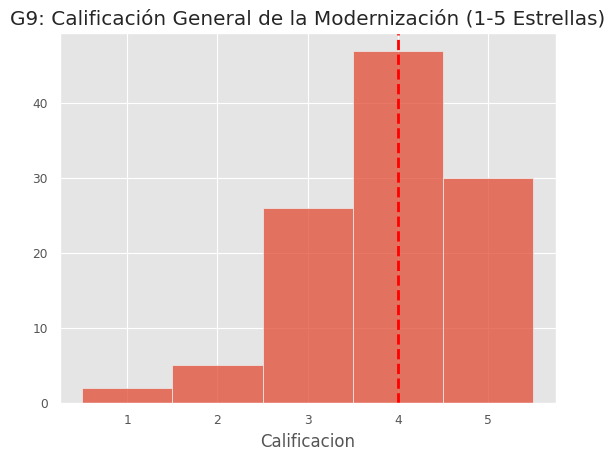

In [15]:
ax = sns.histplot(
    x=data["modernization_score"],
    discrete=True
)

modernization_score_median = data["modernization_score"].median()
ax.axvline(
    x=modernization_score_median,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Median: ${modernization_score_median:.2f}'
)

plt.title("G9: Calificación General de la Modernización (1-5 Estrellas)")
plt.ylabel("")
plt.xlabel("Calificacion")


La distribución está fuertemente sesgada hacia el extremo positivo. La calificación más frecuente (la moda) es 4 estrellas, seguida de cerca por 5 estrellas. La calificación de 3 estrellas es la tercera más común. Las valoraciones negativas de 1 y 2 estrellas son minoritarias y representan una porción muy pequeña de la muestra. La línea roja punteada indica la calificación media (promedio), que se sitúa visualmente alrededor de 4, confirmando una alta tendencia central. 

La opinión general de los becados internos sobre la modernización hospitalaria es altamente positiva. La gran mayoría de los estudiantes ha valorado el proceso con las dos calificaciones más altas posibles (4 o 5 estrellas). 

Esto indica que, más allá de las observaciones específicas de infraestructura (Gráfico 5) o la frecuencia de uso de tecnología (Gráfico 6), la impresión general del proceso de cambio es de un éxito notable. La baja frecuencia de calificaciones de 1 y 2 estrellas sugiere que las experiencias negativas con la modernización son casos aislados. El promedio cercano a 4.0 posiciona la valoración de la muestra en un rango de "Bueno" a "Muy bueno". 

Text(0, 0.5, 'Area medica')

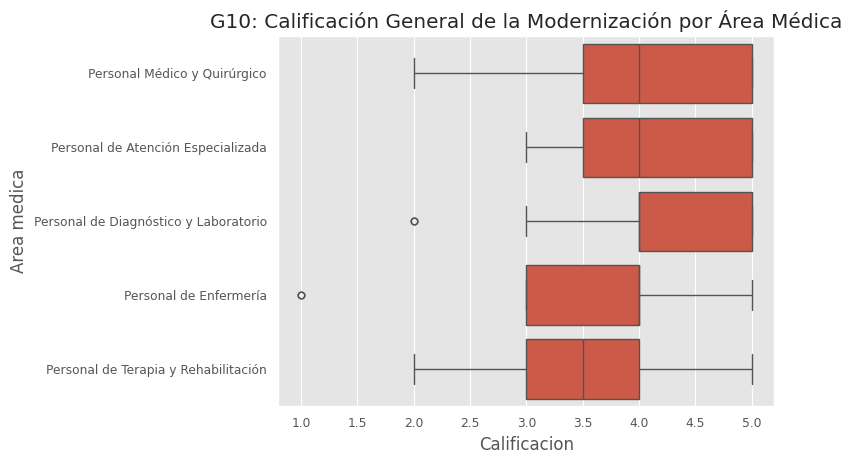

In [16]:
sns.boxplot(data=data,x="modernization_score", y="degree_category")
plt.title("G10: Calificación General de la Modernización por Área Médica")
plt.xlabel("Calificacion")
plt.ylabel("Area medica")


Cada caja muestra la mediana (la línea central), el rango intercuartílico o IQR (la caja que contiene el 50% central de las respuestas) y la distribución general de las valoraciones. A simple vista, el gráfico muestra que, si bien todas las medianas son positivas (de 3.5 a 4.0), hay diferencias notables. Los grupos "Personal Médico", "Atención Especializada" y "Diagnóstico" muestran valoraciones más altas y consistentes, mientras que "Terapia y Rehabilitación" y "Enfermería" son más moderados. 

El análisis de los datos numéricos confirma esta división: 

    Valoración Alta: El "Personal de Atención Especializada" tiene la media más alta con 4.18, seguido de cerca por el "Personal de Diagnóstico y Laboratorio" con 4.07 y el "Personal Médico y Quirúrgico" con 4.00. Es notable que los tres grupos comparten una mediana idéntica de 4.0 estrellas. 

    Valoración Moderada: El "Personal de Terapia y Rehabilitación" presenta la mediana y la media más bajas del estudio (median=3.5, mean=3.42). El "Personal de Enfermería" tiene una mediana de 4.0, pero una media más baja de 3.50; esto indica que algunas calificaciones muy bajas (como el valor atípico en 1.0 estrella) afectaron el promedio del grupo. 

    Diagnóstico: El "Personal de Diagnóstico y Laboratorio" no solo tiene una media alta (4.07), sino también el rango intercuartílico (IQR) más positivo. Según los datos, el 75% de este grupo calificó la modernización con 4 o 5 estrellas (IQR de 4.0 a 5.0). Esto los convierte en el grupo con la opinión positiva más concentrada. 

La opinión positiva está liderada por los roles de Atención Especializada, Diagnóstico y Medicina. Los roles de Terapia y Enfermería, aunque siguen siendo positivos, son más moderados en su valoración. 

Este gráfico es la pieza central del argumento, ya que conecta la "opinión" (Gráfico 10) con la "observación" (Gráficos 6 y 7) y los "Datos Externos". La conclusión es clara: la opinión es directamente proporcional a la exposición observable de la modernización. 

challenges_sentiment                      Mixto  Negativo
challenges_topic                                         
Acceso Y Cobertura                            0         4
Calidad De Atencion                           0        14
Comportamiento Del Paciente                   0         2
Concientizacion Y Formacion                   0         1
Infraestructura Y Capacidad Hospitalaria      1         8
Organizacion Y Gestion                        0        11
Personal De Salud                             0        11
Recursos Y Suministros                        0        14
Tecnologia E Innovacion                       0         3
Tiempos De Espera                             0        22


Text(0, 0.5, 'Desafio')

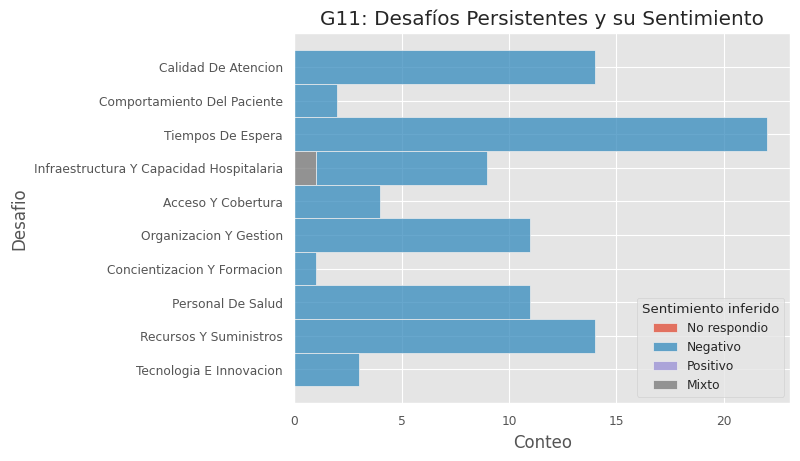

In [17]:
sentiment_map = {
    'Non-Response': "No respondio",
    'Negative': "Negativo",
    'Positive': "Positivo",
    'Mixed': "Mixto"
}

data_subset = data.loc[: , ["challenges_topic", "challenges_sentiment"]]
data_subset["challenges_topic"] = data_subset["challenges_topic"].str.split('_').str.join(' ').str.title()
data_subset["challenges_sentiment"] = data_subset["challenges_sentiment"].astype('str').replace(sentiment_map)
print(pd.crosstab(data_subset["challenges_topic"], data_subset["challenges_sentiment"]))

ax = sns.histplot(
    data=data_subset, 
    y='challenges_topic', 
    hue='challenges_sentiment', 
    multiple="stack",
)
sns.move_legend(ax, loc=4, title="Sentimiento inferido")
plt.title("G11: Desafíos Persistentes y su Sentimiento")

plt.xlabel("Conteo")
plt.ylabel("Desafio")


Los datos numéricos revelan que el desafío más mencionado por un amplio margen es "Tiempos De Espera", con 22 menciones. Le siguen dos tópicos empatados en segundo lugar: "Calidad De Atencion" y "Recursos Y Suministros", ambos con 14 menciones. Los siguientes desafíos más citados son "Personal De Salud" (11 menciones) y "Organizacion Y Gestion" (11 menciones). 

El hallazgo más importante de este gráfico es la naturaleza de los desafíos. Estos no se centran en las herramientas (como en los gráficos de conocimiento), sino en los procesos y el personal. 

 Enfoque en Procesos y "Humanware": Los principales desafíos ("Tiempos De Espera", "Calidad De Atencion", "Organizacion Y Gestion", "Personal De Salud") no son problemas de "hardware" o "software". Son cuellos de botella logísticos (esperas), problemas de gestión y desafíos relacionados con el personal (calidad, cantidad, trato). 

recomendations_sentiment            Mixto  Negativo  Positivo
recomendations_topic                                         
Calidad Del Personal                    1         0         2
Capacitacion Del Personal               0         0         5
Capacitacion En Sistemas Digitales      0         0         3
Eficiencia Atencion                     0         1         7
Equipamiento Tecnologico                0         0         6
Infraestructura Hospitalaria            0         1         7
Trato Humano Al Paciente                0         2         6


Text(0, 0.5, 'Recomendacion')

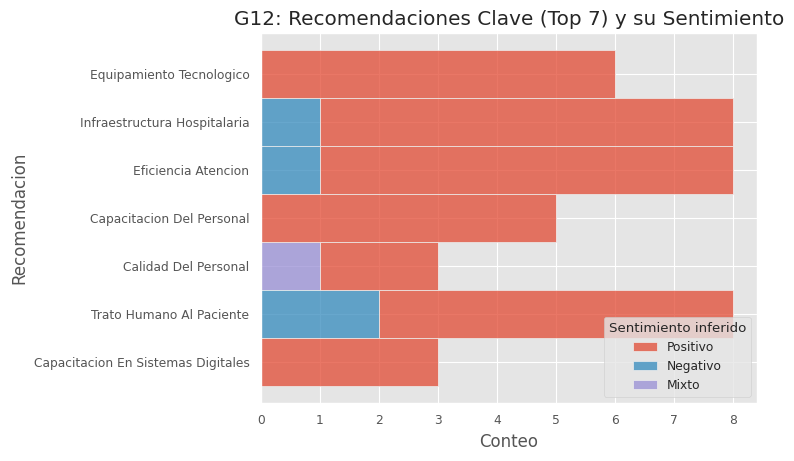

In [18]:
sentiment_map = {
    'Non-Response': "No respondio",
    'Negative': "Negativo",
    'Positive': "Positivo",
    'Mixed': "Mixto"
}
top = data["recomendations_topic"].value_counts().head(7).index

data_subset = data.loc[  data["recomendations_topic"].isin(top) , ["recomendations_topic", "recomendations_sentiment"]]
data_subset["recomendations_topic"] = data_subset["recomendations_topic"].str.split('_').str.join(' ').str.title()
data_subset["recomendations_sentiment"] = data_subset["recomendations_sentiment"].astype('str').replace(sentiment_map)
print(pd.crosstab(data_subset["recomendations_topic"], data_subset["recomendations_sentiment"]))

ax = sns.histplot(
    data=data_subset, 
    y='recomendations_topic', 
    hue='recomendations_sentiment', 
    multiple="stack",
)
sns.move_legend(ax, loc=4, title="Sentimiento inferido")
plt.title("G12: Recomendaciones Clave (Top 7) y su Sentimiento")
plt.xlabel("Conteo")
plt.ylabel("Recomendacion")



Los datos numéricos muestran un empate de tres vías en la recomendación más frecuente (8 menciones cada una): "Eficiencia Atencion", "Infraestructura Hospitalaria" y "Trato Humano Al Paciente". El siguiente grupo de recomendaciones incluye "Equipamiento Tecnologico" (6 menciones) y "Capacitacion Del Personal" (5 menciones). El sentimiento inferido es abrumadoramente "Positivo", lo que indica que las respuestas fueron sugerencias constructivas. 

El análisis de estas recomendaciones proporciona una hoja de ruta clara sobre las necesidades percibidas por los becados, las cuales se pueden agrupar en tres áreas: 

 Hardware y Activos Físicos: Las recomendaciones de "Infraestructura Hospitalaria" (8 menciones) y "Equipamiento Tecnologico" (6 menciones) demuestran que, si bien los estudiantes valoran positivamente la modernización (Gráfico 9), su recomendación es continuar y profundizar la inversión. 

 Procesos y Eficiencia: La recomendación #1, "Eficiencia Atencion" (8 menciones), es la contraparte directa del desafío #1 ("Tiempos De Espera") del Gráfico 11. Los estudiantes conectan el problema con la solución, indicando la necesidad de optimizar los flujos de pacientes y la gestión hospitalaria. 

"Humanware" (El Eje Humano): Este es el tema más fuerte. Las recomendaciones de "Trato Humano Al Paciente" (8 menciones), "Capacitacion Del Personal" (5 menciones) y "Calidad Del Personal" (3 menciones) son una respuesta directa a los desafíos identificados en el Gráfico 11. Es notable la recomendación específica de "Capacitacion En Sistemas Digitales" (3 menciones), que conecta la necesidad de formación directamente con la nueva tecnología. 